In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

### Убираем ненужные колонки

In [6]:
data.drop(['imdb_id','poster_path', 'homepage'],axis=1,inplace=True)

KeyError: "['imdb_id' 'poster_path' 'homepage'] not found in axis"

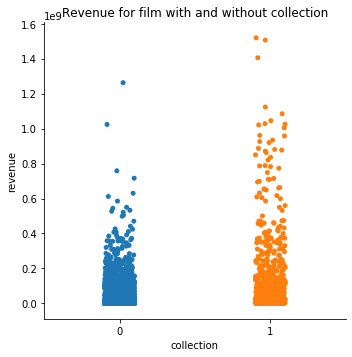

In [7]:
#Converting collections as binary
data['collection'] = 0
data.loc[data['belongs_to_collection'].isnull() == False, 'collection'] = 1

#collections v/s Revenue
sns.catplot(x='collection', y='revenue', data=data);
plt.title('Revenue for film with and without collection');

In [8]:
data=data.drop(['belongs_to_collection'],axis =1)

NameError: name 'test' is not defined

In [11]:
collection = data.loc[data['collection'] != 0]

In [12]:
collection.head()

,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,1
10,11,1000000,"[{'id': 18, 'name': 'Drama'}]",en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",11/21/76,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His whole life was a million-to-one shot.,Rocky,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",117235147,1
11,12,0,"[{'id': 35, 'name': 'Comedy'}]",en,Revenge of the Nerds II: Nerds in Paradise,The members of the Lambda Lambda Lambda frater...,10.543750,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7/10/87,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're Back!,Revenge of the Nerds II: Nerds in Paradise,"[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033,1


In [13]:
original = data.loc[data['collection'] != 1]

In [14]:
original.head()

,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,0
6,7,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,0


In [15]:
collection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 2991
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    604 non-null    int64  
 1   budget                604 non-null    int64  
 2   genres                604 non-null    object 
 3   original_language     604 non-null    object 
 4   original_title        604 non-null    object 
 5   overview              603 non-null    object 
 6   popularity            604 non-null    float64
 7   production_companies  590 non-null    object 
 8   production_countries  601 non-null    object 
 9   release_date          604 non-null    object 
 10  runtime               604 non-null    float64
 11  spoken_languages      603 non-null    object 
 12  status                604 non-null    object 
 13  tagline               538 non-null    object 
 14  title                 604 non-null    object 
 15  Keywords              

In [16]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 2 to 2999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2396 non-null   int64  
 1   budget                2396 non-null   int64  
 2   genres                2389 non-null   object 
 3   original_language     2396 non-null   object 
 4   original_title        2396 non-null   object 
 5   overview              2389 non-null   object 
 6   popularity            2396 non-null   float64
 7   production_companies  2254 non-null   object 
 8   production_countries  2344 non-null   object 
 9   release_date          2396 non-null   object 
 10  runtime               2394 non-null   float64
 11  spoken_languages      2377 non-null   object 
 12  status                2396 non-null   object 
 13  tagline               1865 non-null   object 
 14  title                 2396 non-null   object 
 15  Keywords             

### Выделяем таблицы фильмов, состоящих в коллекциях и оригинальных

In [20]:
n_sample = 500

y1 = collection.sample(n=n_sample, random_state=42)
y2 = original.sample(n=n_sample, random_state=42)


n1 = len(y1)
n2 = len(y2)
# n3 = len(y3)

n = n1 + n2
k = 2

print(n1, n2, n)

500 500 1000


In [19]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 542 to 300
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    500 non-null    int64  
 1   budget                500 non-null    int64  
 2   genres                500 non-null    object 
 3   original_language     500 non-null    object 
 4   original_title        500 non-null    object 
 5   overview              499 non-null    object 
 6   popularity            500 non-null    float64
 7   production_companies  490 non-null    object 
 8   production_countries  497 non-null    object 
 9   release_date          500 non-null    object 
 10  runtime               500 non-null    float64
 11  spoken_languages      499 non-null    object 
 12  status                500 non-null    object 
 13  tagline               451 non-null    object 
 14  title                 500 non-null    object 
 15  Keywords             

### Выделяем бюджет и сборы в отдельные таблицы

In [21]:
y1_rev = y1['revenue']
y1_bud = y1['budget']

In [25]:
y2_rev = y2['revenue']
y2_bud = y2['budget']

In [26]:
y1_rev_mean = np.mean(y1_rev)
y2_rev_mean = np.mean(y2_rev)

y1_rev_s2 = np.var(y1_rev, ddof=1)
y2_rev_s2 = np.var(y2_rev, ddof=1)


print(f'Belong to collection: mean = {np.round(y1_rev_mean, 4)}, std = {np.round(y1_rev_s2**0.5, 4)}')
print(f'Original movies: mean = {np.round(y2_rev_mean, 4)}, std = {np.round(y2_rev_s2**0.5, 4)}')


Belong to collection: mean = 161183991.308, std = 235654949.2024
Original movies: mean = 38154751.12, std = 67615423.6941


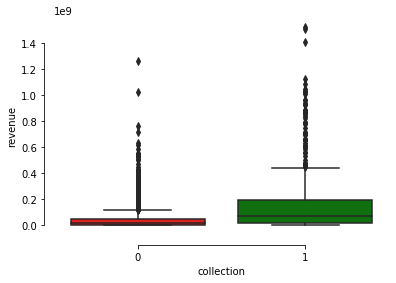

In [29]:
movies_only = pd.concat([collection, original]).reset_index(drop=True)

sns.boxplot(x="collection", y="revenue", palette=["r", "g"], data=movies_only)
sns.despine(offset=10, trim=True)

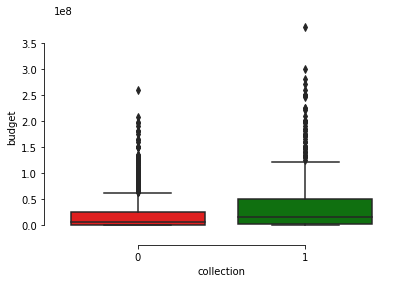

In [30]:
movies_only = pd.concat([collection, original]).reset_index(drop=True)

sns.boxplot(x="collection", y="budget", palette=["r", "g"], data=movies_only)
sns.despine(offset=10, trim=True)

### Проверяем гипотезу влияния принадлежности фильма к коллекции на сборы

In [31]:
y = np.concatenate([y1_rev, y2_rev])

y_mean = np.mean(y)

y_s2 = np.var(y, ddof=1)

print(f'Total revenue: mean = {np.round(y_mean, 4)}, std = {np.round(y_s2**0.5, 4)}')

Total revenue: mean = 99669371.214, std = 183875784.1347


In [34]:
ss_g = np.sum((y - y_mean)**2)
ss_f = ((y1_rev_mean - y_mean)**2) * n1 + ((y2_rev_mean - y_mean)**2) * n2
ss_r = np.sum((y1_rev - y1_rev_mean)**2) + np.sum((y2_rev - y2_rev_mean)**2)

print(f'Сумма квадратов отклонений наблюдений от общего среднего: {np.round(ss_g, 4)}')
print(f'Сумма квадратов отклонений средних групповых значений от общего среднего: {np.round(ss_f, 4)}')
print(f'Остаточная сумма квадратов отклонений: {np.round(ss_r, 4)}')

Сумма квадратов отклонений наблюдений от общего среднего: 3.3776493687171797e+19
Сумма квадратов отклонений средних групповых значений от общего среднего: 3.7840484853091487e+18
Остаточная сумма квадратов отклонений: 2.9992445201862648e+19


In [36]:
s2_g = ss_g / (n - 1)
s2_f = ss_f / (k - 1)
s2_r = ss_r / (n - k)

print(f'Общая дисперсия: {np.round(s2_g, 4)}')
print(f'Факторная дисперсия: {np.round(s2_f, 4)}')
print(f'Остаточная дисперсия: {np.round(s2_r, 4)}')

Общая дисперсия: 3.3810303991162956e+16
Факторная дисперсия: 3.7840484853091487e+18
Остаточная дисперсия: 3.005255030246758e+16


In [38]:
k1 = k - 1
k2 = n - k

In [39]:
F = s2_f / s2_r
print(F)

125.91438820413336


In [42]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.850793370783879

### Проверяем влияние зависимости бюджета от принадлежности фильма к коллекции

In [43]:
y1_mean = np.mean(y1_bud)
y2_mean = np.mean(y2_bud)

y1_s2 = np.var(y1_bud, ddof=1)
y2_s2 = np.var(y2_bud, ddof=1)


print(f'Belong to collection: mean = {np.round(y1_mean, 4)}, std = {np.round(y1_s2**0.5, 4)}')
print(f'Original movies: mean = {np.round(y2_mean, 4)}, std = {np.round(y2_s2**0.5, 4)}')


Belong to collection: mean = 39340778.748, std = 56808608.5121
Original movies: mean = 17946799.808, std = 27282787.4078


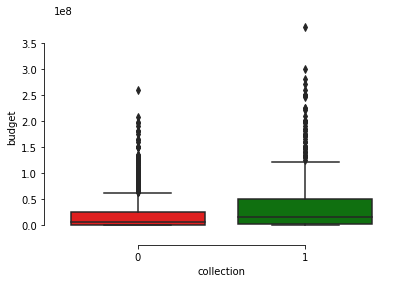

In [44]:
movies_only = pd.concat([collection, original]).reset_index(drop=True)

sns.boxplot(x="collection", y="budget", palette=["r", "g"], data=movies_only)
sns.despine(offset=10, trim=True)

In [45]:
y = np.concatenate([y1_bud, y2_bud])

y_mean = np.mean(y)

y_s2 = np.var(y, ddof=1)

print(f'Total revenue: mean = {np.round(y_mean, 4)}, std = {np.round(y_s2**0.5, 4)}')

Total revenue: mean = 28643789.278, std = 45807604.1367


In [47]:
ss_g = np.sum((y - y_mean)**2)
S2_b = ((y1_mean - y_mean)**2) * n1 + ((y2_mean - y_mean)**2) * n2
S2_w = np.sum((y1_bud - y1_mean)**2) + np.sum((y2_bud - y2_mean)**2)

print(f'Сумма квадратов отклонений наблюдений от общего среднего: {np.round(ss_g, 4)}')
print(f'Сумма квадратов отклонений средних групповых значений от общего среднего: {np.round(S2_b, 4)}')
print(f'Остаточная сумма квадратов отклонений: {np.round(S2_w, 4)}')

Сумма квадратов отклонений наблюдений от общего среднего: 2.0962382601441103e+18
Сумма квадратов отклонений средних групповых значений от общего среднего: 1.1442558372129094e+17
Остаточная сумма квадратов отклонений: 1.98181267642282e+18


In [49]:
k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

In [50]:
F = sigma2_b / sigma2_w
print(F)

28.782313365773323


In [51]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
print(F_crit)

3.004751748095738


### Проверяем влияние бюджета на сборы

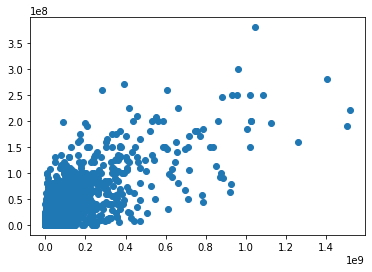

In [52]:
plt.scatter(data['revenue'], data['budget'])